<h2> Проект "HR-аналитика" <a class="tocSkip"></h2>

**Цель проекта**

Разработать для HR-аналитиков компании «Работа с заботой» прогнозную модель, с помощью которой используя предоставленные бизнесом сведения об уровне удовлетворённости сотрудников работой в компании получится быстро и точно отвечать на вопросы бизнеса, касающиеся оттока сотрудников и минимизации связанных с ним финансовых потерь.\
Для достижения указанной цели необходимо решить две следующие задачи:
- *Задача № 1: построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика.*
- *Задача № 2: построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.*
    
**План работы**
    
1. Задача № 1. Предсказание уровня удовлетворённости сотрудника.\
 1.1. Загрузка данных.\
 1.1.1. Загрузка данных и изучение общей информации о данных.\
 1.1.2. Оценка данных на предмет их соответствия описанию.\
 1.2. Предобработка данных.\
 1.2.1. Оценка корректности названий столбцов.\
 1.2.2. Выявление пропусков в данных.\
 1.2.3. Выявление дубликатов в данных.\
 1.3. Исследовательский анализ данных.\
 1.3.1. Статистический анализ признаков.\
 1.3.2. Построение графиков для признаков.\
 1.3.3. Корреляционный анализ признаков.\
 1.4. Подготовка данных - построение пайплайна.\
 1.5. Обучение моделей.\
 1.5.1. Обучение моделей LinearRegression и DecisionTreeRegressor.\
 1.5.2. Выбор лучшей модели и оценка её качества на основе метрики SMAPE.\
 1.6. Вывод по задаче № 1.
2. Задача № 2. Предсказание увольнения сотрудника из компании.\
 2.1. Загрузка данных.\
 2.1.1. Загрузка данных и изучение общей информации о данных.\
 2.1.2. Оценка данных на предмет их соответствия описанию.\
 2.2. Предобработка данных.\
 2.2.1. Оценка корректности названий столбцов.\
 2.2.2. Выявление пропусков в данных.\
 2.2.3. Выявление дубликатов в данных.\
 2.3. Исследовательский анализ данных.\
 2.3.1. Статистический анализ признаков.\
 2.3.2. Построение графиков для признаков.\
 2.3.3. Корреляционный анализ признаков.\
 2.3.4. Портрет «уволившегося сотрудника».\
 2.3.5. Оценка зависимости между уровнем удовлетворённости сотрудника работой в компании и увольнением сотрудника.\
 2.4. Добавление нового входного признака.\
 2.5. Подготовка данных - построение пайплайна.\
 2.6. Обучение моделей.\
 2.6.1. Обучение моделей LogisticRegression, KNeighborsClassifier и RandomForestClassifier.\
 2.6.2. Выбор лучшей модели и оценка её качества на основе метрики ROC-AUC.\
 2.7. Вывод по задаче № 2.
3. Общий вывод.

**Описание данных**
    
***id*** — уникальный идентификатор сотрудника.\
***dept*** — отдел, в котором работает сотрудник.\
***level*** — уровень занимаемой должности.\
***workload*** — уровень загруженности сотрудника.\
***employment_years*** — длительность работы в компании (в годах).\
***last_year_promo*** — показывает, было ли повышение за последний год.\
***last_year_violations*** — показывает, нарушал ли сотрудник трудовой договор за последний год.\
***supervisor_evaluation*** — оценка качества работы сотрудника, которую дал руководитель.\
***salary*** — ежемесячная зарплата сотрудника.\
***job_satisfaction_rate*** — уровень удовлетворённости сотрудника работой в компании (целевой признак, представлен числами от 0 до 1, где 0 — совершенно неудовлетворён, 1 — полностью удовлетворён).

In [ ]:
# Устанавливаем и импортируем необходимые библиотеки и функции, а также объявляем константы
!pip install --upgrade numba
!pip install --upgrade seaborn
!pip install --upgrade shap
!pip install -U scikit-learn
!pip install phik

import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import pylab
import shap
import warnings

from scipy import stats as st
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
from math import factorial
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, MinMaxScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_error, mean_absolute_error, accuracy_score, \
recall_score, precision_score, confusion_matrix, roc_auc_score, make_scorer
from IPython.display import display, HTML
from phik import phik_matrix

RANDOM_STATE = 42

     |████████████████████████████████| 3.7 MB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 43.8 MB 52.0 MB/s eta 0:00:01
     |████████████████████████████████| 18.2 MB 49.6 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.1
    Uninstalling numpy-1.21.1:
      Successfully uninstalled numpy-1.21.1
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.39.0
    Uninstalling llvmlite-0.39.0:
      Successfully uninstalled llvmlite-0.39.0
  Attempting uninstall: numba
    Found existing installation: numba 0.56.0
    Uninstalling numba-0.56.0:
      Successfully uninstalled numba-0.56.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.9.1 requires numpy<1.25.0,>=1.18.5, but you have numpy 1.26.4 which is incompatible.
     |████████████████████████████████| 294 kB 1.1 MB/s eta

## Задача № 1. Предсказание уровня удовлетворённости сотрудника

### Загрузка данных

#### Загрузка данных и изучение общей информации о данных

In [ ]:
# Считываем CSV-файлы с данными и сохраняем их в датафреймы
data_train_job_satisfaction_rate = pd.read_csv('/datasets/train_job_satisfaction_rate.csv')
data_test_features = pd.read_csv('/datasets/test_features.csv')
data_test_target_job_satisfaction_rate = pd.read_csv('/datasets/test_target_job_satisfaction_rate.csv')

In [ ]:
# Изучаем общую информацию о датафреймах
name_of_dataframes = ['<strong>data_train_job_satisfaction_rate</strong>',
                      '<strong>data_test_features</strong>',
                      '<strong>data_test_target_job_satisfaction_rate</strong>'
                      ]

dataframes = [data_train_job_satisfaction_rate, data_test_features, data_test_target_job_satisfaction_rate]

for name_of_dataframe, dataframe in zip(name_of_dataframes, dataframes):
    display(HTML(name_of_dataframe))
    dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


#### Оценка данных на предмет их соответствия описанию

In [ ]:
# Cмотрим на первые строки датафреймов
for name_of_dataframe, dataframe in zip(name_of_dataframes, dataframes):
    display(HTML(name_of_dataframe))
    display(dataframe.head())

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08


**Вывод по этапу первоначального ознакомления с данными:** при считывании файлов проблем выявлено не было, данные, содержащиеся в датафреймах, имеют корректные форматы и соответсвуют описанию.

### Предобработка данных

#### Оценка корректности названий столбцов

In [ ]:
# Создадим функцию, выводящую на экран перечни названий столбцов датафреймов
def list_of_columns(list_1, list_2):
    for i_1, i_2 in zip(list_1, list_2):
        display(HTML(i_1))
        print(list(i_2))

# Вызывем функцию 'list_of_columns' для вывода на экран перечней названий столбцов датафреймов
list_of_columns(name_of_dataframes, dataframes)

['id', 'dept', 'level', 'workload', 'employment_years', 'last_year_promo', 'last_year_violations', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate']


['id', 'dept', 'level', 'workload', 'employment_years', 'last_year_promo', 'last_year_violations', 'supervisor_evaluation', 'salary']


['id', 'job_satisfaction_rate']


*Названия столбцов датафреймов корректны и соответствуют стилю написания snake_case.*

#### Выявление пропусков в данных

In [ ]:
# Создадим функцию, возвращающую количество пропусков в каждом столбце датафрейма
def search_for_passes(list_1, list_2):
    for i_1, i_2 in zip(list_1, list_2):
        display(HTML(i_1))
        print(i_2.isna().sum().sort_values(ascending=False))

# Вызывем функцию 'search_for_passes' для получения сведений о пропусках по каждому столбцу каждого датафрейма
search_for_passes(name_of_dataframes, dataframes)

dept                     6
level                    4
id                       0
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
dtype: int64


dept                     2
level                    1
id                       0
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
dtype: int64


id                       0
job_satisfaction_rate    0
dtype: int64


*Выявлено наличие 6 и 4 пропусков в столбцах 'dept' и 'level' датафрейма 'data_train_job_satisfaction_rate' соответственно, а также 2 и 1 пропуска в аналогичных столбцах датафрейма 'data_test_features' соответственно.\
**Указанные пропуски будут заполнены на этапе построения пайплайна**.*

#### Выявление дубликатов в данных

Рассмотрим датафреймы на предмет наличия строк-дубликатов.

In [ ]:
# Создадим функцию, возвращающую количество строк-дубликатов в каждом датафрейме
def search_for_duplicates(list_1, list_2):
    for i_1, i_2 in zip(list_1, list_2):
        display(HTML(i_1))
        print(i_2.duplicated().sum())

# Вызывем функцию 'search_forduplicates' для получения сведений о наличии строк-дубликатов по каждому датафрейму
search_for_duplicates(name_of_dataframes, dataframes)

0


0


0


*Данные, содержащиеся в датафреймах, не имеют строк-дубликатов.*

Рассмотрим датафреймы на предмет наличия неявных дубликатов.

Исходя из характера содержащихся в столбцах датафреймов данных, неявные дубликаты целесообразно искать в столбцах 'dept', 'level', 'workload', 'last_year_promo' и 'last_year_violations' датафреймов 'data_train_job_satisfaction_rate' и 'data_test_features'.

In [ ]:
# Создадим список столбцов, в которых будем искать неявные дубликаты
list_of_columns_to_find_duplicates = [data_train_job_satisfaction_rate['dept'],
                                      data_train_job_satisfaction_rate['level'],
                                      data_train_job_satisfaction_rate['workload'],
                                      data_train_job_satisfaction_rate['last_year_promo'],
                                      data_train_job_satisfaction_rate['last_year_violations'],
                                      data_test_features['dept'],
                                      data_test_features['level'],
                                      data_test_features['workload'],
                                      data_test_features['last_year_promo'],
                                      data_test_features['last_year_violations']
                                      ]

# Создадим функцию, врозвращающую все уникальные значения столбца
def search_for_implicit_duplicates(list_of_columns):
    for column in list_of_columns:
        print(column.unique())

# Вызывем функцию, врозвращающую все уникальные значения столбца
search_for_implicit_duplicates(list_of_columns_to_find_duplicates)

['sales' 'hr' 'technology' 'purchasing' 'marketing' nan]
['junior' 'middle' 'sinior' nan]
['medium' 'high' 'low']
['no' 'yes']
['no' 'yes']
['marketing' 'hr' 'sales' 'purchasing' 'technology' nan ' ']
['junior' 'middle' 'sinior' nan]
['medium' 'low' 'high' ' ']
['no' 'yes']
['no' 'yes']


*Наличия неявных дубликатов в указанных столбцах не выявлено, однако **в столбцах 'dept' и 'workload' датафрейма 'data_test_features' выявлено наличие значений, представляющих собой пробел.**\
Для корректной дальнейшей работы с данными заменим указанные значения на пропуски.*

In [ ]:
data_test_features.replace(' ', np.nan, inplace=True)

# Еще ра зпосмотрим на уникальные значения столбцов  'dept', 'level', 'workload', 'last_year_promo' и 'last_year_violations'
# датафрейма 'data_test_features' для самопроверки
list_of_columns_to_find_duplicates_after_replacement = [data_test_features['dept'],
                                                        data_test_features['level'],
                                                        data_test_features['workload'],
                                                        data_test_features['last_year_promo'],
                                                        data_test_features['last_year_violations']
                                                        ]

# Вызывем функцию, врозвращающую все уникальные значения столбца
search_for_implicit_duplicates(list_of_columns_to_find_duplicates_after_replacement)

['marketing' 'hr' 'sales' 'purchasing' 'technology' nan]
['junior' 'middle' 'sinior' nan]
['medium' 'low' 'high' nan]
['no' 'yes']
['no' 'yes']


*Пробельные значения в столбцах 'dept' и 'workload' датафрейма 'data_test_features' успешно заменены на пропуски.\
Посмотрим сколько теперь пропусков имеется в данном датафрейме.*

In [ ]:
display(HTML('data_test_features'))
print(data_test_features.isna().sum().sort_values(ascending=False))

dept                     3
level                    1
workload                 1
id                       0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
dtype: int64


*После замены пробелов в датафрейме 'data_test_features' на пропуски количество пропусков в данном датафрейме составляет 3, 1 и 1 в столбцах 'dept', 'level' и 'workload' соответственно.*

**Вывод по этапу предобработки данных:**
- названия столбцов датафреймов корректны и соответствуют стилю написания snake_case;
- выявленные пробельные значения в столбцах 'dept' и 'workload' датафрейма 'data_test_features' заменены на пропуски;
- в данных отсутствуют строки-дубликаты и неявные дубликаты;
- количество пропусков в данных после выполненной замены составило 6 и 4 пропусков в столбцах 'dept' и 'level' датафрейма 'data_train_job_satisfaction_rate' соответственно и 3, 1 и 1 в столбцах 'dept', 'level' и 'workload' датафрейма 'data_test_features' соответственно. Указанные пропуски будут заполнены на этапе подготовки данных (построения пайплайна).

### Исследовательский анализ данных

#### Статистический анализ признаков

Изучим статистические значения числовых признаков датафреймов.

In [ ]:
# Переберем датафреймы в цикле и вызовем для них функцию 'describe()'
for name_of_dataframe, dataframe in zip(name_of_dataframes, dataframes):
    display(HTML(name_of_dataframe))
    display(dataframe.describe())

,id,employment_years,supervisor_evaluation,salary,job_satisfaction_rate
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,544957.621000,3.718500,3.476500,33926.700000,0.533995
std,257883.104622,2.542513,1.008812,14900.703838,0.225327
min,100954.000000,1.000000,1.000000,12000.000000,0.030000
25%,322836.750000,2.000000,3.000000,22800.000000,0.360000
50%,534082.500000,3.000000,4.000000,30000.000000,0.560000
75%,771446.000000,6.000000,4.000000,43200.000000,0.710000
max,999521.000000,10.000000,5.000000,98400.000000,1.000000


,id,employment_years,supervisor_evaluation,salary
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,552765.213500,3.666500,3.526500,34066.800000
std,253851.326129,2.537222,0.996892,15398.436729
min,100298.000000,1.000000,1.000000,12000.000000
25%,339052.000000,1.000000,3.000000,22800.000000
50%,550793.000000,3.000000,4.000000,30000.000000
75%,765763.750000,6.000000,4.000000,43200.000000
max,999029.000000,10.000000,5.000000,96000.000000


,id,job_satisfaction_rate
count,2000.000000,2000.00000
mean,552765.213500,0.54878
std,253851.326129,0.22011
min,100298.000000,0.03000
25%,339052.000000,0.38000
50%,550793.000000,0.58000
75%,765763.750000,0.72000
max,999029.000000,1.00000


*На первый взгляд статистических данные не вызывают подозрений.\
Рассмотрим графики "ящик с усами" для вышеуказанных признаков с целью выявления выбросов.*

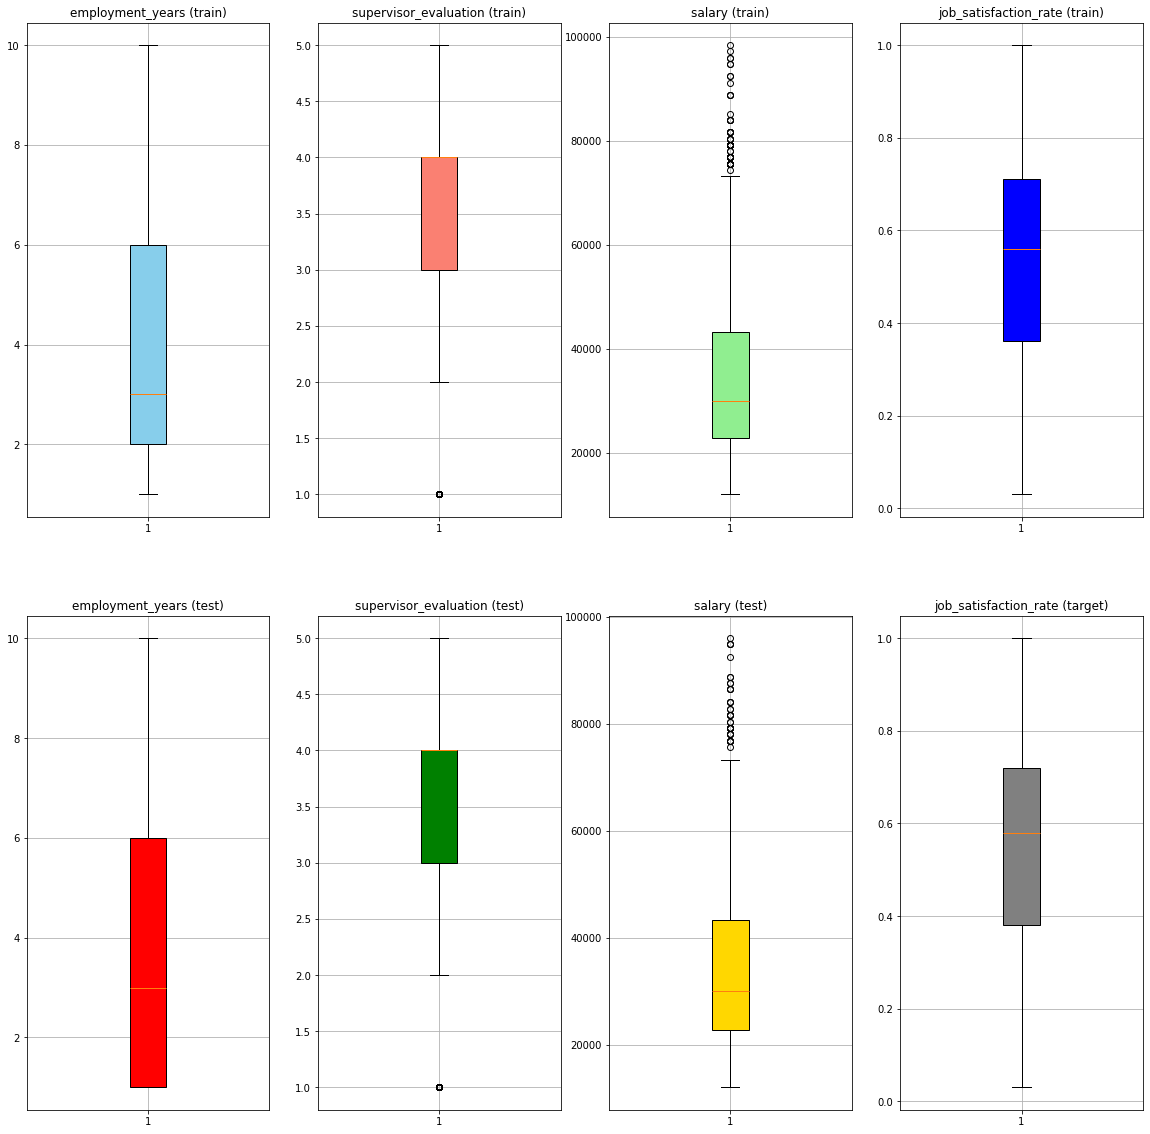

In [ ]:
gs = GridSpec(2, 4)
fig = plt.figure(figsize=(20, 20))

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[0, 3])
ax5 = fig.add_subplot(gs[1, 0])
ax6 = fig.add_subplot(gs[1, 1])
ax7 = fig.add_subplot(gs[1, 2])
ax8 = fig.add_subplot(gs[1, 3])

ax1.boxplot(data_train_job_satisfaction_rate['employment_years'], patch_artist=True, boxprops=dict(facecolor='skyblue'))
ax2.boxplot(data_train_job_satisfaction_rate['supervisor_evaluation'], patch_artist=True, boxprops=dict(facecolor='salmon'))
ax3.boxplot(data_train_job_satisfaction_rate['salary'], patch_artist=True, boxprops=dict(facecolor='lightgreen'))
ax4.boxplot(data_train_job_satisfaction_rate['job_satisfaction_rate'], patch_artist=True, boxprops=dict(facecolor='blue'))
ax5.boxplot(data_test_features['employment_years'], patch_artist=True, boxprops=dict(facecolor='red'))
ax6.boxplot(data_test_features['supervisor_evaluation'], patch_artist=True, boxprops=dict(facecolor='green'))
ax7.boxplot(data_test_features['salary'], patch_artist=True, boxprops=dict(facecolor='gold'))
ax8.boxplot(data_test_target_job_satisfaction_rate['job_satisfaction_rate'], patch_artist=True, boxprops=dict(facecolor='gray'))

list_of_signs = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]
list_of_signs_name = ['employment_years (train)',
                      'supervisor_evaluation (train)',
                      'salary (train)',
                      'job_satisfaction_rate (train)',
                      'employment_years (test)',
                      'supervisor_evaluation (test)',
                      'salary (test)',
                      'job_satisfaction_rate (target)']

for i_1, i_2 in zip(list_of_signs_name, list_of_signs):
    i_2.set_title(i_1)
    i_2.grid(True)

plt.show();

*Из представленных графиков видно, что значение столбцов 'supervisor_evaluation' равное 1 является выбросом для датафреймов data_train_job_satisfaction_rate и data_test_features, так как данное значение экстремально низкое. Однако оснований исключать данное значение из данных не усматривается ввиду того, что в действительности руководитель в самом деле может ставить низкую оценку качеству работы сотрудника лишь в каких-то вопиющих случаях невыполнения работником его функций, нарушения трудовой дисциплины и т.п.\
Также для столбцов 'salary' указанных датафреймов выбросами являются все значения выше ~72000 и ~74000 соответственно. Считать указанные выбросы некорректностью данных также нет оснований.*

#### Построение графиков для признаков

Рассмотрим графическое представление числовых признаков датафреймов, чтобы иметь представление об их распределении.

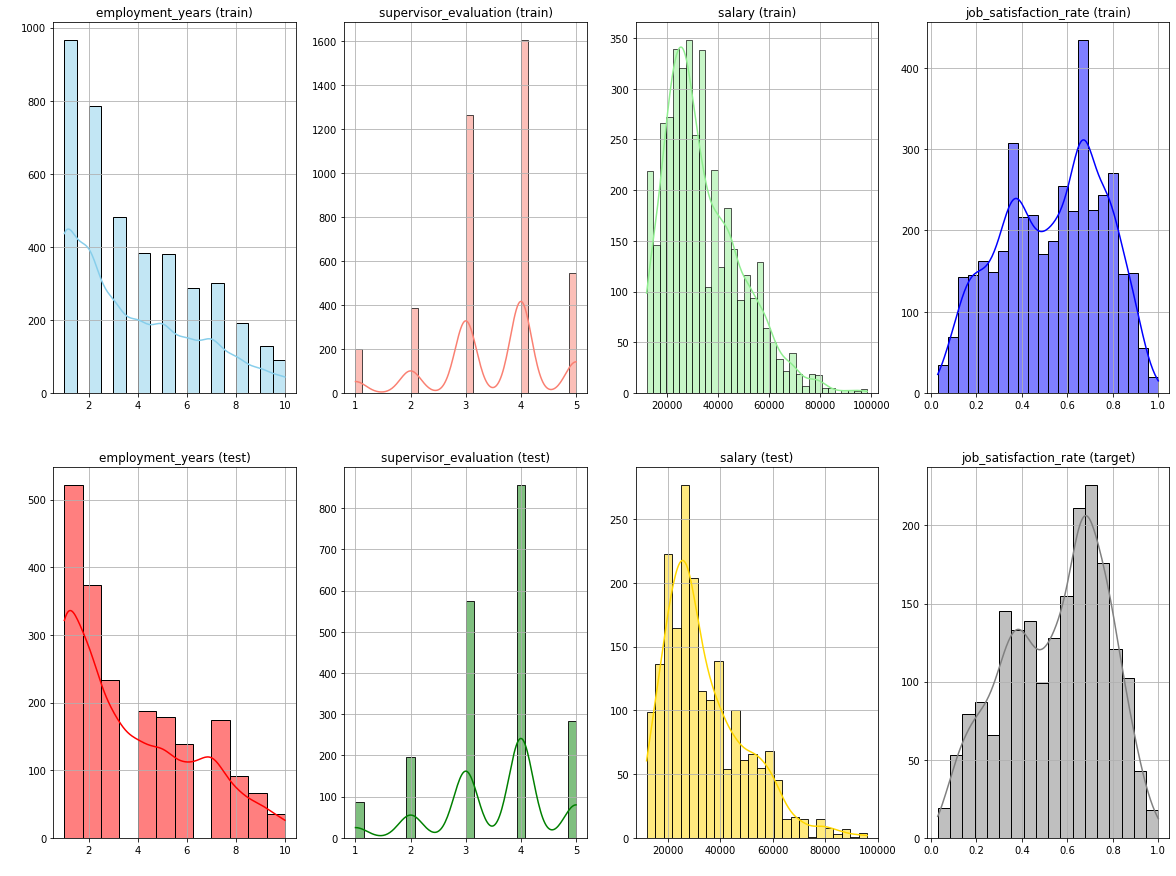

In [ ]:
gs = GridSpec(2, 4)
fig = plt.figure(figsize=(20, 15))

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[0, 3])
ax5 = fig.add_subplot(gs[1, 0])
ax6 = fig.add_subplot(gs[1, 1])
ax7 = fig.add_subplot(gs[1, 2])
ax8 = fig.add_subplot(gs[1, 3])

sns.histplot(data=data_train_job_satisfaction_rate['employment_years'], color='skyblue', kde=True, ax=ax1)
sns.histplot(data=data_train_job_satisfaction_rate['supervisor_evaluation'], color='salmon', kde=True, ax=ax2)
sns.histplot(data=data_train_job_satisfaction_rate['salary'], color='lightgreen', kde=True, ax=ax3)
sns.histplot(data=data_train_job_satisfaction_rate['job_satisfaction_rate'], color='blue', kde=True, ax=ax4)
sns.histplot(data=data_test_features['employment_years'], color='red', kde=True, ax=ax5)
sns.histplot(data=data_test_features['supervisor_evaluation'], color='green', kde=True, ax=ax6)
sns.histplot(data=data_test_features['salary'], color='gold', kde=True, ax=ax7)
sns.histplot(data=data_test_target_job_satisfaction_rate['job_satisfaction_rate'], color='gray', kde=True, ax=ax8)

list_of_signs = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]

for i_1, i_2 in zip(list_of_signs_name, list_of_signs):
    i_2.set_title(i_1)
    i_2.grid(True)
    i_2.set_xlabel(' ')
    i_2.set_ylabel(' ')

plt.show();

*На основании вышепредставленных графиков можно сделать выводы, что признак 'employment_years' и 'salary' обоих датафреймов распределены ненормально, тогда как признаки 'supervisor_evaluation' и 'job_satisfaction_rat' всех трех датафреймов, вероятно, имеют нормальное распределение со смещением вправо.*

Рассмотрим графическое представление категориальных признаков датафреймов, чтобы иметь представление об их составе.

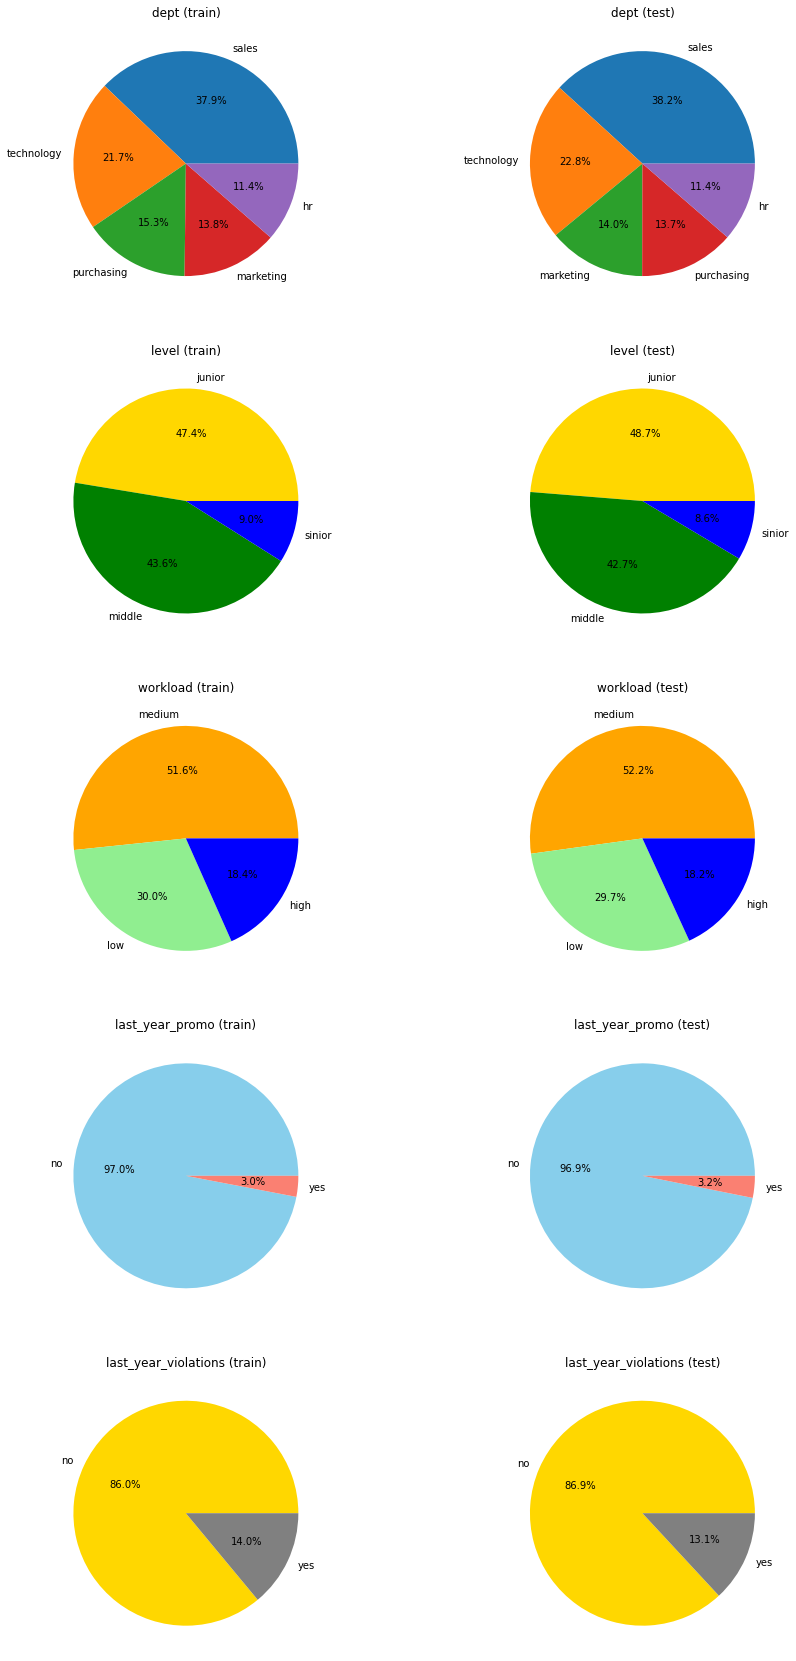

In [ ]:
fig, axs = plt.subplots(5, 2, figsize=(15, 30))

data_train_job_satisfaction_rate['dept'].value_counts().plot(kind='pie', ax=axs[0, 0], autopct='%1.1f%%')
data_test_features['dept'].value_counts().plot(kind='pie', ax=axs[0, 1], autopct='%1.1f%%')
data_train_job_satisfaction_rate['level'].value_counts().plot(kind='pie', ax=axs[1, 0], autopct='%1.1f%%', colors=['gold', 'green', 'blue'])
data_test_features['level'].value_counts().plot(kind='pie', ax=axs[1, 1], autopct='%1.1f%%', colors=['gold', 'green', 'blue'])
data_train_job_satisfaction_rate['workload'].value_counts().plot(kind='pie', ax=axs[2, 0], autopct='%1.1f%%', colors=['orange', 'lightgreen', 'blue'])
data_test_features['workload'].value_counts().plot(kind='pie', ax=axs[2, 1], autopct='%1.1f%%', colors=['orange', 'lightgreen', 'blue'])
data_train_job_satisfaction_rate['last_year_promo'].value_counts().plot(kind='pie', ax=axs[3, 0], autopct='%1.1f%%', colors=['skyblue', 'salmon'])
data_test_features['last_year_promo'].value_counts().plot(kind='pie', ax=axs[3, 1], autopct='%1.1f%%', colors=['skyblue', 'salmon'])
data_train_job_satisfaction_rate['last_year_violations'].value_counts().plot(kind='pie', ax=axs[4, 0], autopct='%1.1f%%', colors=['gold', 'gray'])
data_test_features['last_year_violations'].value_counts().plot(kind='pie', ax=axs[4, 1], autopct='%1.1f%%', colors=['gold', 'gray'])

list_of_category_signs = [axs[0, 0], axs[0, 1], axs[1, 0], axs[1, 1], axs[2, 0], axs[2, 1], axs[3, 0], axs[3, 1], axs[4, 0], axs[4, 1]]
list_of_category_signs_name = ['dept (train)',
                               'dept (test)',
                               'level (train)',
                               'level (test)',
                               'workload (train)',
                               'workload (test)',
                               'last_year_promo (train)',
                               'last_year_promo (test)',
                               'last_year_violations (train)',
                               'last_year_violations (test)'
                               ]

for i_1, i_2 in zip(list_of_category_signs_name, list_of_category_signs):
    i_2.set_title(i_1)
    i_2.set_ylabel(' ')

plt.show()

*Из представленных диаграмм видно следующее:*
- *в обоих датафреймах самое большое количество опрошенных сотрудников работает в отделе продаж (sales) - 37.9% и 38.2%, а самое маленькое - в отделе кадров (hr) - по 11.4%;*
- *в обоих датафреймах больше всего опрошенных сотрудников среди джуниоров - 47.4% и 48.7%, а самое меньшее среди сеньоров - 9.0% и 8.6%;*
- *более половины опрошенных сотрудников в каждом датафрейме имеют среднюю загруженность (medium) - 51.6% и 52.2%, наименьшее количество опрошенных среди сотрудников с высокой загруженностью (high) - 18.4% и 18.2%;*
- *в обоих датафреймах преобладающее количество опрошенных сотрудников не получало повышений за последний год - 97.0% и 96.9%;*
- *в обоих датафреймах большинство опрошенных сотрудников не нарушало трудового договора за последний год - 86.0% и 86.9%.*

#### Корреляционный анализ признаков

Перед изучением корреляции между признаками посмотрим какое распределение имеют количественные признаки (нормальное или ненормальное).

In [ ]:
# Создадим функцию, которая переберет список количественных признаков датафрейма 'data_market_final' и определит, какое
# распределение они имеют
col_sign = [data_train_job_satisfaction_rate['employment_years'],
            data_train_job_satisfaction_rate['supervisor_evaluation'],
            data_train_job_satisfaction_rate['salary'],
            data_train_job_satisfaction_rate['job_satisfaction_rate'],
            data_test_features['employment_years'],
            data_test_features['supervisor_evaluation'],
            data_test_features['salary'],
            data_test_target_job_satisfaction_rate['job_satisfaction_rate']
            ]

def distribution_calculation(data):
    results = [st.chisquare(col) for col in data]
    p_values = [result[1] for result in results]
    is_normal = [p_value >= 0.05 for p_value in p_values]
    return is_normal

# Получаем список булевых значений характеристик распределения признаков и преобразуем его в датафрейм для создания таблицы с
# результатами
distribution_list = distribution_calculation(col_sign)
distribution_df = pd.DataFrame(distribution_list).rename(columns={0:'Признак'})
distribution_df['Количественный признак'] = ['employment_years (train)',
                                             'supervisor_evaluation (train)',
                                             'salary (train)',
                                             'job_satisfaction_rate (train)',
                                             'employment_years (test)',
                                             'supervisor_evaluation (test)',
                                             'salary (test)',
                                             'job_satisfaction_rate (target)'
                                             ]

# На основании булевых значенй создаем столбец датафрейма, содержащий сведения о характеристиках распределения данных
def categorize_distribution(row):
    if row['Признак'] == False:
        return 'Данные распределены ненормально'
    else:
        return 'Данные распределены нормально'

distribution_df['Характеристика распределения данных'] = distribution_df.apply(categorize_distribution, axis=1)
distribution_df.drop(columns=['Признак']).set_index('Количественный признак')

,Характеристика распределения данных
Количественный признак,
employment_years (train),Данные распределены ненормально
supervisor_evaluation (train),Данные распределены нормально
salary (train),Данные распределены ненормально
job_satisfaction_rate (train),Данные распределены нормально
employment_years (test),Данные распределены ненормально
supervisor_evaluation (test),Данные распределены нормально
salary (test),Данные распределены ненормально
job_satisfaction_rate (target),Данные распределены нормально


Построим матрицы корреляции для датафреймов 'data_train_job_satisfaction_rate' и 'data_test_features'.

interval columns not set, guessing: ['employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate']


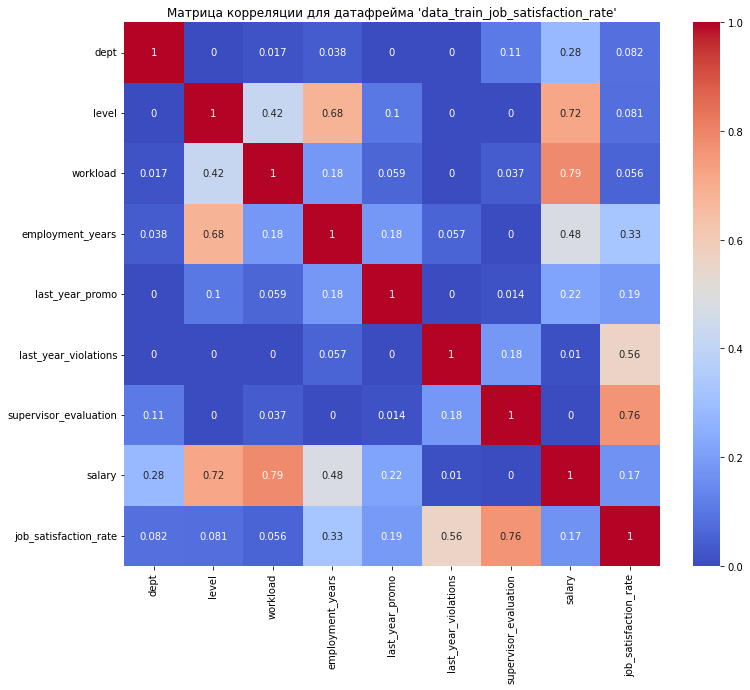

In [ ]:
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(phik_matrix(data_train_job_satisfaction_rate.drop(columns=['id'])), cmap='coolwarm', annot=True)
plt.yticks(rotation=0)
plt.title("Матрица корреляции для датафрейма 'data_train_job_satisfaction_rate'")
plt.show()

interval columns not set, guessing: ['employment_years', 'supervisor_evaluation', 'salary']


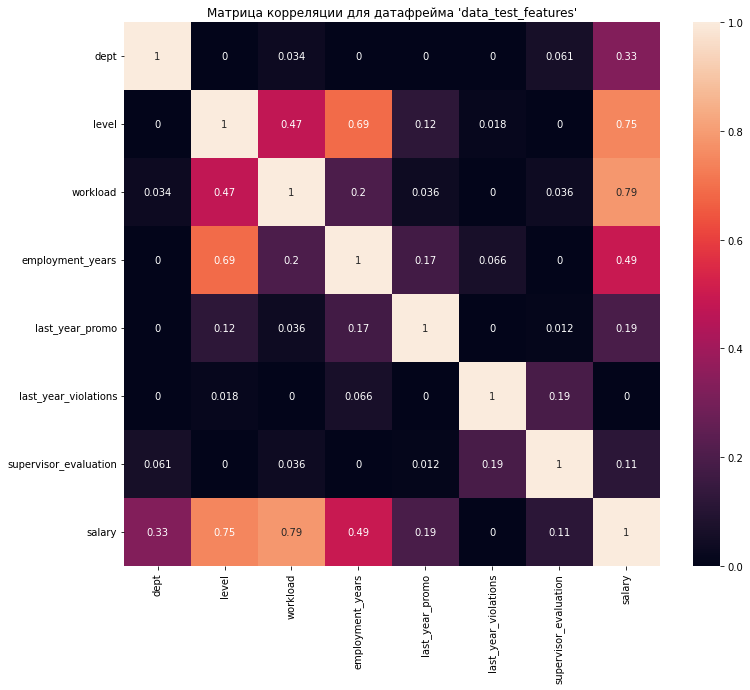

In [ ]:
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(phik_matrix(data_test_features.drop(columns=['id'])), annot=True)
plt.yticks(rotation=0)
plt.title("Матрица корреляции для датафрейма 'data_test_features'")
plt.show()

*В датафрейме 'data_train_job_satisfaction_rate' выявлена высокая корреляция между признаками 'job_satisfaction_rate' и 'supervisor_evaluation' - 0.76, а также средняя корреляция между признаками 'job_satisfaction_rate' и last_year_violations - 0.56. Вероятно, уровень удовлетворенности работника работой в компании сильно зависит от того, как качество работы работника оценивается руководителем, а также от факта нарушения сотрудниками условий трудового договора.\
Также в обоих датафреймах есть зависимость между признаками 'salary' и 'employment_years' - 0.48 и 0.49 соответственно, 'salary' и 'level' - 0.72 и 0.75, 'salary' и 'workload' - по 0.79. Можно предположить, что, чем дольше работник работает в компании, чем выше его должность и загруженность, тем выше его зарплата.\
Мультиколлинеарности (корреляция от 0.9 до 0.95 по модулю) в датафреймах не выявлено.*

### Подготовка данных - построение пайплайна

Представленные для выполнения задания данные уже поделены на датафрейм, содеражащий входные и целевой признаки для тренировочной выборки (X_train + y_train), и датафреймы, содеражащие входные (X_test) и целевой признак для тестовой выборки (y_test).\
Перед началом создания пайплайна необходимо разбить датафрейм, содеражащий входные и целевой признаки для тренировочной выборки на два отдельных датафрейма (X_train и y_train), а также объеденить датафреймы, содеражащие входные (X_test) и целевой признак для тестовой выборки (y_test) по 'id' c целью упорядочивания, содержащихся в них данных друг с другом, после чего разбить вновь на два датафрейма аналогично тренировочной выборке.

In [ ]:
X_train = data_train_job_satisfaction_rate.drop(['job_satisfaction_rate'], axis=1)
y_train = data_train_job_satisfaction_rate['job_satisfaction_rate']

test = data_test_features.merge(data_test_target_job_satisfaction_rate, on='id')

X_test = test.drop(['job_satisfaction_rate'], axis=1)
y_test = test['job_satisfaction_rate']

При кодировании категориальных признаков используем **OneHotEncoder** для кодирования признаков, не имеющих никакого естетсвенного порядка: **'dept', 'last_year_promo', 'last_year_violations'**, и **OrdinalEncoder** для кодирования признаков **'level'** и **'workload'**, предположив, что уровни должности и загруженности имеют между собой естественный порядок.\
При кодировании количественных признаков используем **StandardScaler** в отношении признака, не имеющего выбросов **'employment_years'**, и **RobustScaler** - для признаков, которые имеют выбросы: **'supervisor_evaluation'** и **'salary'**, так как RobustScaler более устойчив к выбросам.

In [ ]:
%%time

# Создаём списки признаков
ohe_columns = ['dept', 'last_year_promo', 'last_year_violations']
ord_columns = ['level', 'workload']
standard_num_columns = ['employment_years']
robust_num_columns = ['supervisor_evaluation', 'salary']

# создаём пайплайн для подготовки признаков из списка ohe_columns, в том числе заполняющий пропуски в данных
ohe_pipe = Pipeline([('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
                     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))])

# создаём пайплайн для подготовки признаков из списка ord_columns, в том числе заполняющий пропуски в данных
ord_pipe = Pipeline([('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
                     ('ord',  OrdinalEncoder(categories=[['junior', 'middle', 'sinior'],
                                                         ['low', 'medium', 'high']
                                                         ],
                                                         handle_unknown='use_encoded_value', unknown_value=np.nan)),
                     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))])

# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('standard_num', StandardScaler(), standard_num_columns),
     ('robust_num', RobustScaler(), robust_num_columns)
     ],
    remainder='passthrough'
)

CPU times: user 54 µs, sys: 8 µs, total: 62 µs
Wall time: 66.3 µs


*Данные подготовлены к обучению моделей.*

### Обучение моделей

#### Обучение моделей LinearRegression и DecisionTreeRegressor

In [ ]:
%%time

# Отключим предупреждения о будущих изменениях
warnings.filterwarnings("ignore", category=FutureWarning)

# Создаем функцию для расчета метрики SMAPE
def smape(y_true, y_pred):
    error = np.abs(y_true - y_pred)
    scale = (np.abs(y_true) + np.abs(y_pred)) / 2
    return np.mean(error / scale) * 100
smape_scorer = make_scorer(smape, greater_is_better=False)

# Создаём итоговый пайплайн
pipe_final = Pipeline([('preprocessor', data_preprocessor),
                      ('models', None)
                      ])

param_grid = [
    # словарь для модели LinearRegression
    {
        'models': [LinearRegression()],
        'models__fit_intercept': [True, False],
        'preprocessor__standard_num': [StandardScaler(), RobustScaler(), 'passthrough'],
        'preprocessor__robust_num': [StandardScaler(), RobustScaler(), 'passthrough']
    },
    # словарь для модели DecisionTreeRegressor
    {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__max_depth': range(1, 15),
        'models__min_samples_split': range(1, 15),
        'models__min_samples_leaf': range(1, 15),
        'preprocessor__standard_num': [StandardScaler(), RobustScaler(), 'passthrough'],
        'preprocessor__robust_num': [StandardScaler(), RobustScaler(), 'passthrough']
    },
]

randomized_search = RandomizedSearchCV(
    pipe_final,
    param_grid,
    cv=5,
    scoring=smape_scorer,
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search.fit(X_train, y_train)

CPU times: user 2.6 s, sys: 6.99 ms, total: 2.6 s
Wall time: 2.61 s


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['dept',
                                                                                'last_year_promo',
                                                                                'last_year_violations']),
                                                                              ('ord',
                                                                               Pip...
                                         'models__max_depth': range(1, 15),
                                         'models__min_samples_leaf': range(1, 15),
                                         'models__min_samples_split': range(1, 15),
                                         'preprocessor__robust_num': [StandardScaler(),
                                                                      RobustScaler(),
                                                                      'passthrough'],
                                         'preprocessor__standard_num': [StandardScaler(),
                                                                        RobustScaler(),
                                                                        'passthrough']}],
                   random_state=42,
                   scoring=make_scorer(smape, greater_is_better=False, response_method='predict'))

#### Выбор лучшей модели и оценка её качества на основе метрики SMAPE

In [ ]:
display(HTML('<strong>Лучшая модель и её параметры:</strong>'), randomized_search.best_estimator_)
print(randomized_search.best_estimator_)
print(' ')
print('Метрика SMAPE лучшей модели на кроссвалидации:', randomized_search.best_score_ * -1)

# Рассчитаем прогноз на тестовых данных
y_test_pred = randomized_search.predict(X_test)
print(f'Метрика SMAPE лучшей модели на тестовой выборке: {smape(y_test, y_test_pred)}')
print(' ')

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_befor...
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan)),
                                                                  ('simpleImputer_after_ord',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['level', 'workload']),
                                                 ('standard_num', 'passthrough',
                                                  ['employment_years']),
                                                 ('robust_num',
                                                  StandardScaler(),
                                                  ['supervisor_evaluation',
                                                   'salary'])])),
                ('models',
                 DecisionTreeRegressor(max_depth=14, min_samples_leaf=6,
                                       min_samples_split=9, random_state=42))])

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  Pipeline(s

Сохраним все модели, которые были использованы при поиске лучшей модели, и их параметры.

In [ ]:
result = pd.DataFrame(randomized_search.cv_results_)
# Посмотрим на получившийся датафрейм
display(result[['rank_test_score', 'param_models', 'mean_test_score','params']].sort_values('rank_test_score').head())

,rank_test_score,param_models,mean_test_score,params
0,1,DecisionTreeRegressor(random_state=42),-15.421085,"{'preprocessor__standard_num': 'passthrough', ..."
4,2,DecisionTreeRegressor(random_state=42),-15.480325,"{'preprocessor__standard_num': 'passthrough', ..."
7,3,DecisionTreeRegressor(random_state=42),-15.543320,"{'preprocessor__standard_num': 'passthrough', ..."
9,4,DecisionTreeRegressor(random_state=42),-16.118828,"{'preprocessor__standard_num': 'passthrough', ..."
1,5,DecisionTreeRegressor(random_state=42),-16.592033,{'preprocessor__standard_num': StandardScaler(...


### Вывод по задаче № 1

Установлено, что лучшей моделью для предсказания уровня удовлетворенности работников работой в компании является **DecisionTreeRegressor** со следующими параметрами: **'max_depth'=14, 'min_samples_leaf'=6, 'min_samples_split'=9**.\
Лучшая модель и ее параметры были подобраны в пайплайне путем рандомного перебора гиперпараметров двух моделей: LinearRegression и DecisionTreeRegressor посредством метода **RandomizedSearchCV.**\
Для LinearRegression был установлен гиперпараметр 'fit_intercept' (True, False), для DecisionTreeRegressor - 'max_depth' (1, 15), 'min_samples_split' (1, 15) и 'min_samples_leaf' (1, 15).\
Значение **метрики SMAPE** лучшей модели на тестовой выборке составило **~14.10**.

## Задача № 2. Предсказание увольнения сотрудника из компании

### Загрузка данных

#### Загрузка данных и изучение общей информации о данных

In [ ]:
# Считываем новые CSV-файлы с данными и сохраняем их в датафреймы
data_train_quit = pd.read_csv('/datasets/train_quit.csv')
data_test_target_quit = pd.read_csv('/datasets/test_target_quit.csv')

In [ ]:
# Изучаем общую информацию о датафреймах
name_of_dataframes_2 = ['<strong>data_train_quit',
                      '<strong>data_test_target_quit</strong>'
                      ]

dataframes_2 = [data_train_quit, data_test_target_quit]

for name_of_dataframe, dataframe in zip(name_of_dataframes_2, dataframes_2):
    display(HTML(name_of_dataframe))
    dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


#### Оценка данных на предмет их соответствия описанию

In [ ]:
# Cмотрим на первые строки датафреймов
for name_of_dataframe, dataframe in zip(name_of_dataframes_2, dataframes_2):
    display(HTML(name_of_dataframe))
    display(dataframe.head())

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no


,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes


**Вывод по этапу первоначального ознакомления с данными:** при считывании файлов проблем выявлено не было, данные, содержащиеся в датафреймах, имеют корректные форматы и соответсвуют описанию.

### Предобработка данных

#### Оценка корректности названий столбцов

In [ ]:
# Вызывем функцию 'list_of_columns' для вывода на экран перечней названий столбцов датафреймов
list_of_columns(name_of_dataframes_2, dataframes_2)

['id', 'dept', 'level', 'workload', 'employment_years', 'last_year_promo', 'last_year_violations', 'supervisor_evaluation', 'salary', 'quit']


['id', 'quit']


*Названия столбцов датафреймов корректны и соответствуют стилю написания snake_case.*

#### Выявление пропусков в данных

In [ ]:
# Вызывем функцию 'search_for_passes' для получения сведений о пропусках по каждому столбцу каждого датафрейма
search_for_passes(name_of_dataframes_2, dataframes_2)

id                       0
dept                     0
level                    0
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
quit                     0
dtype: int64


id      0
quit    0
dtype: int64


*Пропусков в данных не выявлено.*

#### Выявление дубликатов в данных

Рассмотрим датафреймы на предмет наличия строк-дубликатов.

In [ ]:
# Вызывем функцию 'search_forduplicates' для получения сведений о наличии строк-дубликатов по каждому датафрейму
search_for_duplicates(name_of_dataframes_2, dataframes_2)

0


0


*В данных отсутствуют строки-дубликаты.*

Рассмотрим датафреймы на предмет наличия неявных дубликатов.

Исходя из характера содержащихся в столбцах датафреймов данных, неявные дубликаты целесообразно искать в столбцах 'dept', 'level', 'workload', 'last_year_promo', 'last_year_violations' датафрейма 'data_train_quit' и в стобце 'quit' обоих датафреймов.

In [ ]:
# Создадим список столбцов, в которых будем искать неявные дубликаты
list_of_columns_to_find_duplicates_2 = [data_train_quit['dept'],
                                        data_train_quit['level'],
                                        data_train_quit['workload'],
                                        data_train_quit['last_year_promo'],
                                        data_train_quit['last_year_violations'],
                                        data_train_quit['quit'],
                                        data_test_target_quit['quit']
                                        ]

# Вызывем функцию, врозвращающую все уникальные значения столбца
search_for_implicit_duplicates(list_of_columns_to_find_duplicates_2)

['sales' 'purchasing' 'marketing' 'technology' 'hr']
['middle' 'junior' 'sinior']
['high' 'medium' 'low']
['no' 'yes']
['no' 'yes']
['no' 'yes']
['yes' 'no']


*Наличия неявных дубликатов в указанных столбцах не выявлено.*

**Вывод по этапу предобработки данных:**
- названия столбцов датафреймов корректны и соответствуют стилю написания snake_case;
- в данных отсутствуют пропуски;
- в данных отсутствуют строки-дубликаты и неявные дубликаты.

### Исследовательский анализ данных

#### Статистический анализ признаков

Изучим статистические значения числовых признаков датафрейма 'data_train_quit'.

In [ ]:
display(data_train_quit.describe())

,id,employment_years,supervisor_evaluation,salary
count,4000.000000,4000.000000,4000.000000,4000.000000
mean,552099.283750,3.701500,3.474750,33805.800000
std,260158.031387,2.541852,1.004049,15152.415163
min,100222.000000,1.000000,1.000000,12000.000000
25%,327785.750000,2.000000,3.000000,22800.000000
50%,546673.000000,3.000000,4.000000,30000.000000
75%,781497.750000,6.000000,4.000000,43200.000000
max,999915.000000,10.000000,5.000000,96000.000000


*Выбросов и подозрительных значений не наблюдается, однако для большей наглядности рассмотрим графики "ящик с усами" для вышеуказанных признаков.*

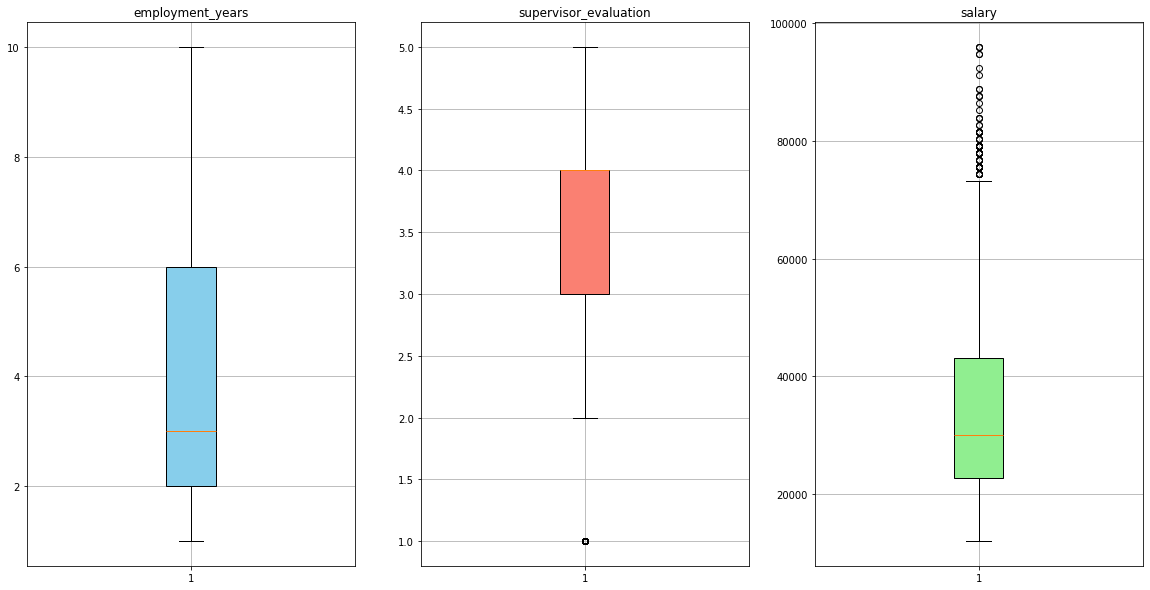

In [ ]:
gs = GridSpec(1, 3)
fig = plt.figure(figsize=(20, 10))

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])

ax1.boxplot(data_train_quit['employment_years'], patch_artist=True, boxprops=dict(facecolor='skyblue'))
ax2.boxplot(data_train_quit['supervisor_evaluation'], patch_artist=True, boxprops=dict(facecolor='salmon'))
ax3.boxplot(data_train_quit['salary'], patch_artist=True, boxprops=dict(facecolor='lightgreen'))

list_of_signs = [ax1, ax2, ax3]
list_of_signs_name = ['employment_years', 'supervisor_evaluation', 'salary']

for i_1, i_2 in zip(list_of_signs_name, list_of_signs):
    i_2.set_title(i_1)
    i_2.grid(True)

plt.show();

*Аналогично набоам данных, предоставленных для выполнения задания 1 из представленных графиков видно, что значение столбца 'supervisor_evaluation' равное 1 является выбросом, так как данное значение экстремально низкое. Однако оснований исключать данное значение из данных не усматривается ввиду того, что в действительности руководитель в самом деле может ставить низкую оценку качеству работы сотрудника. Также для столбца 'salary' выбросами являются все значения заработной платы выше ~73000. Считать указанные выбросы некорректностью данных также нет оснований.*

#### Построение графиков для признаков

Рассмотрим графическое представление числовых признаков датафрейма 'data_train_quit'.

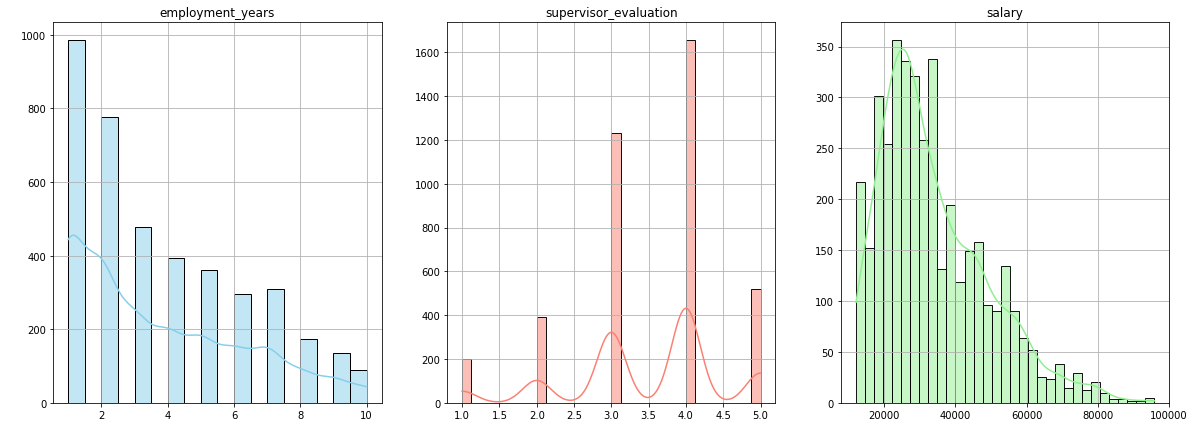

In [ ]:
gs = GridSpec(1, 3)
fig = plt.figure(figsize=(20, 7))

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])

sns.histplot(data=data_train_quit['employment_years'], color='skyblue', kde=True, ax=ax1)
sns.histplot(data=data_train_quit['supervisor_evaluation'], color='salmon', kde=True, ax=ax2)
sns.histplot(data=data_train_quit['salary'], color='lightgreen', kde=True, ax=ax3)

list_of_signs = [ax1, ax2, ax3]

for i_1, i_2 in zip(list_of_signs_name, list_of_signs):
    i_2.set_title(i_1)
    i_2.grid(True)
    i_2.set_xlabel(' ')
    i_2.set_ylabel(' ')

plt.show();

*На основании вышепредставленных графиков можно сделать выводы, что признак 'employment_years' и 'salary' распределены ненормально, а признак 'supervisor_evaluation', вероятно, имеет нормальное распределение со смещением вправо.*

Рассмотрим диаграммы категориальных признаков датафреймов 'data_train_quit' и 'data_test_target_quit'.

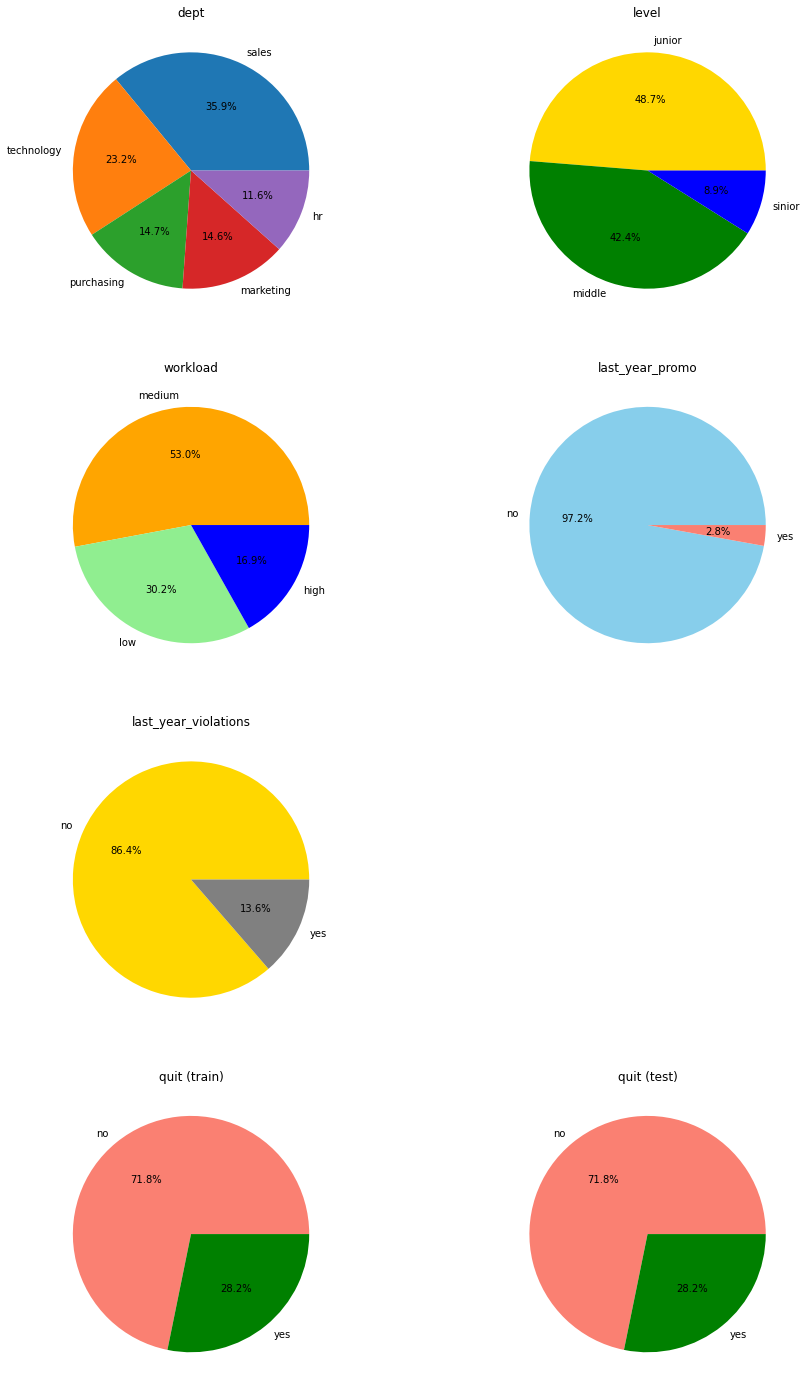

In [ ]:
gs = GridSpec(4, 2)
fig = plt.figure(figsize=(15, 25))

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[2, 0])
ax6 = fig.add_subplot(gs[3, 0])
ax7 = fig.add_subplot(gs[3, 1])

data_train_quit['dept'].value_counts().plot(kind='pie', ax=ax1, autopct='%1.1f%%')
data_train_quit['level'].value_counts().plot(kind='pie', ax=ax2, autopct='%1.1f%%', colors=['gold', 'green', 'blue'])
data_train_quit['workload'].value_counts().plot(kind='pie', ax=ax3, autopct='%1.1f%%', colors=['orange', 'lightgreen', 'blue'])
data_train_quit['last_year_promo'].value_counts().plot(kind='pie', ax=ax4, autopct='%1.1f%%', colors=['skyblue', 'salmon'])
data_train_quit['last_year_violations'].value_counts().plot(kind='pie', ax=ax5, autopct='%1.1f%%', colors=['gold', 'gray'])
data_train_quit['quit'].value_counts().plot(kind='pie', ax=ax6, autopct='%1.1f%%', colors=['salmon', 'green'])
data_test_target_quit['quit'].value_counts().plot(kind='pie', ax=ax7, autopct='%1.1f%%', colors=['salmon', 'green'])

list_of_category_signs = [ax1, ax2, ax3, ax4, ax5, ax6, ax7]
list_of_category_signs_name = ['dept',
                               'level',
                               'workload',
                               'last_year_promo',
                               'last_year_violations',
                               'quit (train)',
                               'quit (test)'
                               ]

for i_1, i_2 in zip(list_of_category_signs_name, list_of_category_signs):
    i_2.set_title(i_1)
    i_2.set_ylabel(' ')

plt.show()

*Из представленных диаграмм видно следующее:*
- *самое большое количество опрошенных сотрудников работает в отделе продаж (sales) - 35.9%, а самое маленькое - в отделе кадров (hr) - по 11.6%;*
- *больше всего опрошенных сотрудников среди джуниоров - 48.7%, а самое меньшее среди сеньоров - 8.9%;*
- *более половины опрошенных сотрудников имеют среднюю загруженность (medium) - 53.0%, наименьшее количество опрошенных среди сотрудников с высокой загруженностью (high) - 16.9%;*
- *преобладающее количество опрошенных сотрудников не получало повышений за последний год - 97.2%;*
- *большинство опрошенных сотрудников не нарушало трудового договора за последний год - 86.4%;*
- *целевой признак (quit) в обоих датафреймах распределен одинаково: 'no' - 71.8% и 'yes' - 28.2%*

#### Корреляционный анализ признаков

Перед изучением корреляции между признаками посмотрим какое распределение имеют количественные признаки (нормальное или ненормальное).

In [ ]:
col_sign = [data_train_quit['employment_years'],
            data_train_quit['supervisor_evaluation'],
            data_train_quit['salary']
            ]

# Получаем список булевых значений характеристик распределения признаков, используя функцию 'distribution_calculation', и
# преобразуем его в датафрейм для создания таблицы с результатами
distribution_list = distribution_calculation(col_sign)
distribution_df = pd.DataFrame(distribution_list).rename(columns={0:'Признак'})
distribution_df['Количественный признак'] = ['employment_years', 'supervisor_evaluation', 'salary']

# Создаем столбец, содержащий сведения о характеристиках распределения данных
distribution_df['Характеристика распределения данных'] = distribution_df.apply(categorize_distribution, axis=1)
distribution_df.drop(columns=['Признак']).set_index('Количественный признак')

,Характеристика распределения данных
Количественный признак,
employment_years,Данные распределены ненормально
supervisor_evaluation,Данные распределены нормально
salary,Данные распределены ненормально


Построим матрицу корреляции для датафрейма 'data_train_quit'.

interval columns not set, guessing: ['employment_years', 'supervisor_evaluation', 'salary']


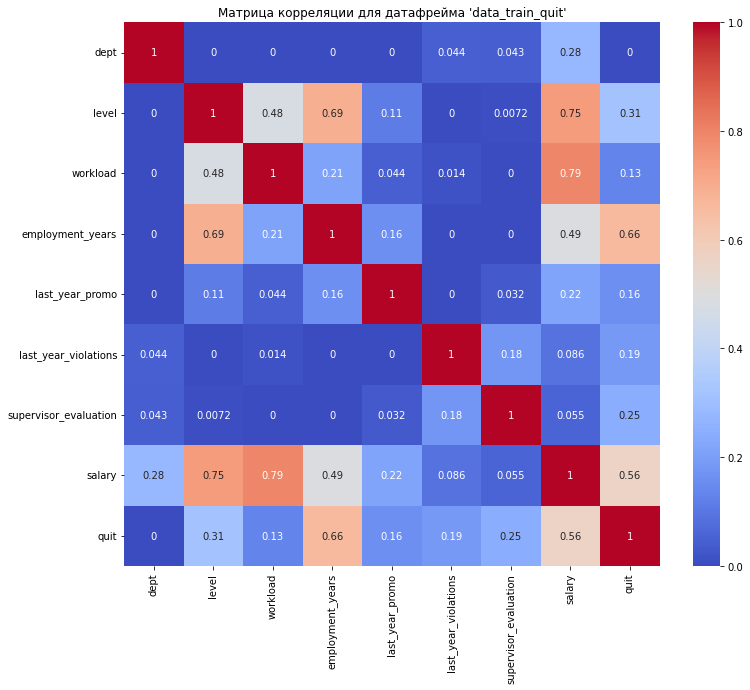

In [ ]:
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(phik_matrix(data_train_quit.drop(columns=['id'])), cmap='coolwarm', annot=True)
plt.yticks(rotation=0)
plt.title("Матрица корреляции для датафрейма 'data_train_quit'")
plt.show()

*Установлено наличие зависимости между признаками 'salary' и 'level' (0.75), 'salary' и 'workload' (0.79), 'salary' и 'employment_years' (0.49), 'quit' и 'employment_years' (0.66), 'quit' и 'salary' (0.56), 'level' и 'employment_years' (0.69) и 'level' и 'workload' (0.48). Можно предположить, что чем дольше работник работает в компании, чем выше его должность и загруженность, тем выше его зарплата, также от стажа в работе компании зависит насколько высокую должность имеет работник и его загруженность на работе. Целевой же признак - увольнение из компании связаны со стажем работы в компании и зарплатой, таким образом, вероятно, сотрудники увольняются преимущественно по двум причинам: неудовлетворенность зарплатой и "выгорание" на работе.\
Мультиколлинеарности (корреляция от 0.9 до 0.95 по модулю) в датафрейме не выявлено.*

#### Портрет «уволившегося сотрудника»

Изучим сотрудники, каких отделов чаще увольняются и какую загруженность имели уволивщиеся сотрудники.

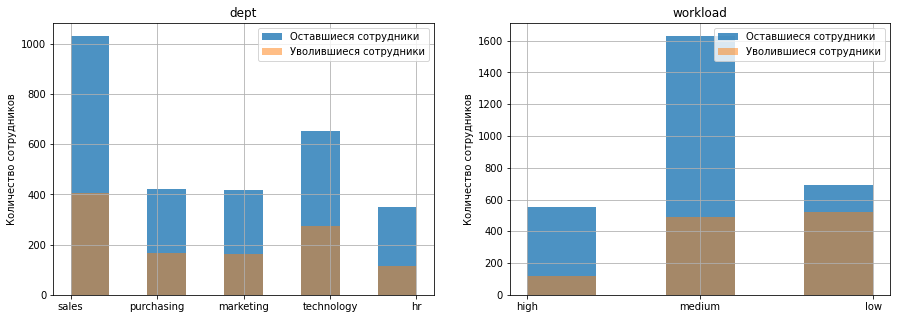

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axes[0].hist(x=data_train_quit.query('quit == "no"')['dept'], alpha=0.8, label='Оставшиеся сотрудники', bins=9)
axes[0].hist(x=data_train_quit.query('quit == "yes"')['dept'], alpha=0.5, label='Уволившиеся сотрудники', bins=9)
axes[1].hist(x=data_train_quit.query('quit == "no"')['workload'], alpha=0.8, label='Оставшиеся сотрудники', bins=5)
axes[1].hist(x=data_train_quit.query('quit == "yes"')['workload'], alpha=0.5, label='Уволившиеся сотрудники', bins=5)

list_of_sign = [axes[0], axes[1]]
list_of_sign_name = ['dept', 'workload']

for i_1, i_2 in zip(list_of_sign_name, list_of_sign):
    i_2.set_title(i_1)
    i_2.set_ylabel('Количество сотрудников')
    i_2.grid(True)
    i_2.legend()

plt.show();

*Из представленных гистограмм не усматривается, чтобы сотрудники увольнялись из какого-либо из отделов меньше или больше, чем из других: больше всего уволившихся сотрудников в отделе продаж (sales), но это лишь потому что этот в принципе самый многочисленный, в процентных же значениях каждый из 5 отделов компании имеет около 40-45% уволившихся сотрудников (не намного меньше процент лишь в отделе кадров (hr) - около 33%.\
В контексте загруженности уволивщихся сотрудников данные несколько удивляют, так как процентное значание уволившихся сотрудников самое высокое среди сотрудников, которые имели низкую загруженность - около 80-85%, тогда как самый низкий процент среди сотрудников с высокой нагрузкой - около 20%. Среди сотрудников со средней загруженностью уволившихся около 30%. В количественных значениях больше всего уволившихся сотрудников среди сотрудников с низкой загруженностью, а меньше всего среди сотрудников с высокой загруженностью.\
Можем предположить, что сотрудники с низкой загруженностью имеют низкие зарплаты и уходят по причине неудовлетворенности зарплатой.*\

Сравним средние зарплаты уволившихся сотрудников и оставшихся сотрудников.

In [ ]:
salary_level = pd.DataFrame({' ': ['Оставшиеся сотрудники', 'Уволившиеся сотрудники'],
                             'Средняя зарплата': [data_train_quit.query('quit == "no"')['salary'].mean(),
                                                  data_train_quit.query('quit == "yes"')['salary'].mean()]
                              }).set_index(' ')
salary_level

,Средняя зарплата
,
Оставшиеся сотрудники,37702.228412
Уволившиеся сотрудники,23885.106383


*Видим, что средняя зарплата оставшихся сотрудников составляет ~37700, а уволившихся ~23885.*

**Выводы по портрету «уволившегося сотрудника»:**
- уволившиеся сотрудники "не привязаны" к какому-то конкретному (конкретным) отделам, процент уволившихся сотрудников в каждом отделе варьируется в районе 40-45% (немного меньше процент уволившихся сотрудников в отделе кадров (hr) - ~33%);
- уволившиеся сотрудники преимущественно являются сотрудниками с низкой загруженностью, в меньшей степени со средней загруженностью;
- уволившиеся сотрудники имеют низкую зарплату, в среднем на треть меньше, чем сотрудники, оставшиеся в компании: ~37700 у оставшихся против уволившихся ~23885 у уволившихся.

#### Оценка зависимости между уровнем удовлетворённости сотрудника работой в компании и увольнением сотрудника

В целях оценки зависимости между уровнем удовлетворённости сотрудника работой в компании и увольнением сотрудника объединим оба целевых признака тестовой выборки ('data_test_target_job_satisfaction_rate' и 'data_test_target_quit') в один датафрейм.

In [ ]:
data_test_target = data_test_target_job_satisfaction_rate.merge(data_test_target_quit, on='id')
# Выведем первые строки датафрейма 'data_test_target' для самопроверки
data_test_target.head()

,id,job_satisfaction_rate,quit
0,130604,0.74,no
1,825977,0.75,no
2,418490,0.60,yes
3,555320,0.72,no
4,826430,0.08,yes


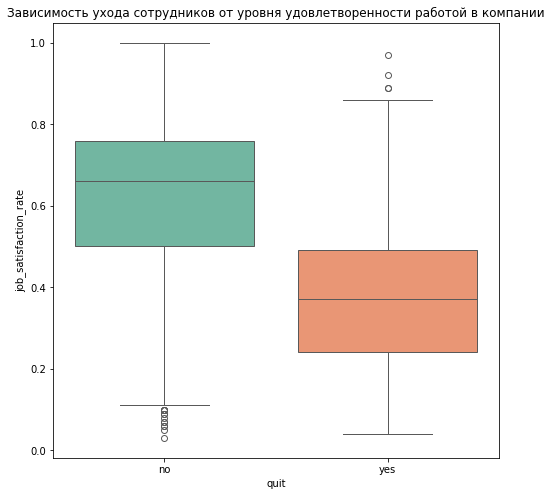

In [ ]:
plt.figure(figsize=(8, 8))
sns.boxplot(x='quit', y='job_satisfaction_rate', data=data_test_target, palette='Set2')
plt.title('Зависимость ухода сотрудников от уровня удовлетворенности работой в компании')
plt.show()

*Из представленных график "ящик с усами" видно, что между уровнем удовлетворённости сотрудника работой в компании и увольнением действительно есть зависимость: сотрудники, чья удовлетворенность работой около 0.1 и меньше крайне редко остаются работать в компании (показатель 'no' признака 'quit' для таких сотрудников является выбросом), при этом сотрудники, чья удовлетворенность работой около 0.9 и выше крайне редко увольняются из компании (показатель 'yes' признака 'quit' для таких сотрудников является выбросом).\
Медианное значение признака 'job_satisfaction_rate' для сотрудников, оставшихся в компании составляет ~0.69, а для уволившихся сотрудников - ~0.39.*

### Добавление нового входного признака

Добавим предсказанные лучшей моделью, полученной в задаче № 1, уровни удовлетворенности сотрудников работой в компании, полученные на датафреймах 'data_test_features' и 'data_train_quit' к входным признакам задачи № 2.

In [ ]:
# Извлечем из randomized_search лучшую модель, полученную в задаче № 1, а также методы обработки данных, использованные при
# обучении лучшей модели в задаче № 1
best_model = randomized_search.best_estimator_.named_steps['models']
best_preprocessor = randomized_search.best_estimator_.named_steps['preprocessor']
best_model

DecisionTreeRegressor(max_depth=14, min_samples_leaf=6, min_samples_split=9,
                      random_state=42)

In [ ]:
# Добавим предсказанные лучшей моделью задачи № 1 уровни удовлетворенности сотрудников работой в компании к входным признакам
# задачи № 2
data_test_features['job_satisfaction_rate_pred'] = y_test_pred

data_train_quit_processed = best_preprocessor.transform(data_train_quit)
job_satisfaction_rate_pred_test_train = best_model.predict(data_train_quit_processed)

data_train_quit['job_satisfaction_rate_pred'] = job_satisfaction_rate_pred_test_train

In [ ]:
# Выведем датафреймы 'data_test_features' и 'data_train_quit' с добавленными к ним предсказаниями на экран
display(HTML('<strong>data_test_features</strong>'))
display(data_test_features.head(3))
display(HTML('<strong>data_train_quit</strong>'))
data_train_quit.head(3)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate_pred
0,485046,marketing,junior,medium,2,no,no,5,28800,0.888889
1,686555,hr,junior,medium,1,no,no,4,30000,0.698571
2,467458,sales,middle,low,5,no,no,4,19200,0.695714


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate_pred
0,723290,sales,middle,high,2,no,no,4,54000,no,0.626667
1,814010,sales,junior,medium,2,no,no,4,27600,no,0.822941
2,155091,purchasing,middle,medium,5,no,no,1,37200,no,0.382727


*Предсказания уровней удовлетворенности сотрудников работой в компании, полученные с помощью лучшей модели из задачи № 1 успешно добавлены к входным признакам тренировочной и тестовой выборок задачи № 2.*

### Подготовка данных - построение пайплайна

Перед началом создания пайплайна необходимо разбить датафрейм, содеражащий входные и целевой признаки для тренировочной выборки на два отдельных датафрейма (X_train_2 и y_train_2), а также объеденить датафреймы, содеражащие входные (X_test_2) и целевой признак для тестовой выборки (y_test_2) по 'id' c целью упорядочивания, содержащихся в них данных о сотрудниках компании, после чего разбить вновь на два датафрейма аналогично тренировочной выборке.

In [ ]:
X_train_2 = data_train_quit.drop(['quit'], axis=1)
y_train_2 = data_train_quit['quit']

test_2 = data_test_features.merge(data_test_target_quit, on='id')

X_test_2 = test_2.drop(['quit'], axis=1)
y_test_2 = test_2['quit']

При кодировании категориальных признаков используем **OneHotEncoder** для кодирования признаков, не имеющих никакого естетсвенного порядка: **'dept', 'last_year_promo', 'last_year_violations'**, и **OrdinalEncoder** для кодирования признаков **'level'** и **'workload'**, предположив, что уровни должности и загруженности имеют между собой естественный порядок. Для кодирования количественных признаков используем **StandardScaler**.

In [ ]:
%%time

# Создаём списки признаков
ohe_columns = ['dept', 'last_year_promo', 'last_year_violations']
ord_columns = ['level', 'workload']
num_columns = ['employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate_pred']

# создаём пайплайн для подготовки признаков из списка ohe_columns, в том числе заполняющий пропуски в данных
ohe_pipe = Pipeline([('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
                     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))])

# создаём пайплайн для подготовки признаков из списка ord_columns, в том числе заполняющий пропуски в данных
ord_pipe = Pipeline([('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
                     ('ord',  OrdinalEncoder(categories=[['junior', 'middle', 'sinior'],
                                                         ['low', 'medium', 'high'],
                                                         ],
                                                         handle_unknown='use_encoded_value', unknown_value=np.nan)),
                     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))])

# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', StandardScaler(), num_columns)
     ],
    remainder='passthrough'
)

CPU times: user 93 µs, sys: 0 ns, total: 93 µs
Wall time: 99.7 µs


*Данные подготовлены к обучению моделей.*

### Обучение моделей

#### Обучение моделей LogisticRegression, KNeighborsClassifier и RandomForestClassifier

In [ ]:
%%time

# Создаём итоговый пайплайн
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', None)
])

param_grid = [
    # словарь для модели LogisticRegression
    {
        'models': [LogisticRegression(
           random_state=RANDOM_STATE,
           solver='liblinear',
           penalty='l1'
        )],
        'models__C': range(1, 100),
        'preprocessor__num': [StandardScaler(), RobustScaler(), 'passthrough']
    },
    # словарь для модели KNeighborsClassifier
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 5),
        'preprocessor__num': [StandardScaler(), RobustScaler(), 'passthrough']
    },
    # словарь для модели RandomForestClassifier
    {
        'models': [RandomForestClassifier(random_state=RANDOM_STATE)],
        'models__n_estimators': [100, 200, 300],
        'models__max_depth': [None, 10, 20, 30],
        'models__min_samples_split': [2, 5, 10],
        'models__min_samples_leaf': [1, 2, 4],
        'preprocessor__num': [StandardScaler(), RobustScaler(), 'passthrough']
    }
]

randomized_search_2 = RandomizedSearchCV(
    pipe_final,
    param_grid,
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1,
    error_score='raise'
)
randomized_search_2.fit(X_train_2, y_train_2)

CPU times: user 17.7 s, sys: 1.56 s, total: 19.3 s
Wall time: 19.3 s


RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['dept',
                                                                                'last_year_promo',
                                                                                'last_year_viol...
                                         'preprocessor__num': [StandardScaler(),
                                                               RobustScaler(),
                                                               'passthrough']},
                                        {'models': [RandomForestClassifier(random_state=42)],
                                         'models__max_depth': [None, 10, 20,
                                                               30],
                                         'models__min_samples_leaf': [1, 2, 4],
                                         'models__min_samples_split': [2, 5,
                                                                       10],
                                         'models__n_estimators': [100, 200,
                                                                  300],
                                         'preprocessor__num': [StandardScaler(),
                                                               RobustScaler(),
                                                               'passthrough']}],
                   random_state=42, scoring='roc_auc')

#### Выбор лучшей модели и оценка её качества на основе метрики ROC-AUC

In [ ]:
display(HTML('<strong>Лучшая модель и её параметры:</strong>'), randomized_search_2.best_estimator_)
print(randomized_search_2.best_estimator_)
print(' ')
print('Метрика ROC-AUC лучшей модели на кроссвалидации:', randomized_search_2.best_score_)

# Рассчитаем прогноз на тестовых данных
y_test_pred_proba = randomized_search_2.predict_proba(X_test_2)[:, 1]
print(f'Метрика ROC-AUC лучшей модели на тестовой выборке: {roc_auc_score(y_test_2, y_test_pred_proba)}')
print(' ')

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_befor...
                                                                                               'medium',
                                                                                               'high']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan)),
                                                                  ('simpleImputer_after_ord',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['level', 'workload']),
                                                 ('num', 'passthrough',
                                                  ['employment_years',
                                                   'supervisor_evaluation',
                                                   'salary',
                                                   'job_satisfaction_rate_pred'])])),
                ('models',
                 RandomForestClassifier(max_depth=30, min_samples_leaf=4,
                                        random_state=42))])

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  Pipeline(s

### Вывод по задаче № 2

Установлено, что лучшей моделью для предсказания увольнения сотрудника из компании является **RandomForestClassifier** со следующими параметрами: **'max_depth'=30, 'min_samples_leaf'=4.**\
Лучшая модель и ее параметры были подобраны в пайплайне путем рандомного перебора гиперпараметров трех моделей: LogisticRegression, KNeighborsClassifier и RandomForestClassifier посредством метода **RandomizedSearchCV.**\
Для LogisticRegression был установлен гиперпараметр 'C' (1, 100), для KNeighborsClassifier - 'n_neighbors' (2, 5), для RandomForestClassifier - 'n_estimators' (100, 200, 300), 'max_depth' (None, 10, 20, 30), 'min_samples_split' (2, 5, 10) и 'min_samples_leaf' (1, 2, 4).\
Значение **метрики ROC-AUC** лучшей модели на тестовой выборке составило **~0.93**.

## Общий вывод

**Описание поставленной задачи**

Настоящее исследование проведено с целью разработки для HR-аналитиков компании «Работа с заботой» прогнозной модели, которая позволяла бы используя предоставляемые бизнесом сведения о сотрудниках компании, в том числе об уровне их удовлетворённости работой в компании, быстро и точно отвечать на вопросы бизнеса, касающиеся оттока сотрудников и минимизации связанных с ним финансовых потерь.\
Для достижения указанной цели были решены следующие две задачи:
- *Задача № 1: построение модели, предсказывающей уровень удовлетворённости сотрудника работой в компании на основе данных заказчика.*
- *Задача № 2: построение модели, предсказывающей на основе данных заказчика уволится сотрудник из компании или нет.*

**Описание работы, проделанной в целях решения поставленной задачи**

*В рамках задачи № 1:*

1. Предоставленные данные оценены на предмет корректности их форматов и соответсвия описанию.

2. Проведена предобработка данных:
- названия столбцов датафреймов оценены на соответствие стилю написания snake_case;
- выявлены и заменены на пропуски пробельные значения в столбцах 'dept' и 'workload' датафрейма 'data_test_features';
- установлено отсутствие в данных строк-дубликатов и неявных дубликатов;
- выявлены пропуски в данных (6 и 4 пропусков в столбцах 'dept' и 'level' датафрейма 'data_train_job_satisfaction_rate' соответственно и 3, 1 и 1 в столбцах 'dept', 'level' и 'workload' датафрейма 'data_test_features' соответственно).
3. Проведен исследовательский анализ данных:
- установлено отсутствие в данных необъяснимых выбросов, подлежащих удалению;
- сделаны выводы о распределении количественных признаков ('employment_years' и 'salary' распределены ненормально, 'supervisor_evaluation' и 'job_satisfaction_rat' имеют нормальное распределение со смещением вправо);
- изучены характеристики категориальных признаков (установлено, что самое большое количество опрошенных об удовлетворенности работой сотрудников работает в отделе продаж (sales) ~38%, а самое маленькое - в отделе кадров (hr) - 11.4%, больше всего опрошенных сотрудников среди джуниоров - ~48%, а самое меньшее среди сеньоров - ~9%, более половины опрошенных сотрудников имеют среднюю загруженность (medium) - ~52%, наименьшее количество опрошенных среди сотрудников с высокой загруженностью (high) - ~18.3%, преобладающее количество опрошенных сотрудников не получало повышений за последний год - ~97%, большинство опрошенных сотрудников не нарушало трудового договора за последний год - ~86%);
- изучена корреляция между признаками (выявлена высокая корреляция между признаками 'job_satisfaction_rate' и 'supervisor_evaluation' - 0.76, а также средняя корреляция между признаками 'job_satisfaction_rate' и last_year_violations - 0.56, выявлена зависимость между признаками 'salary' и 'employment_years' - ~0.47, 'salary' и 'level' - ~0.73, 'salary' и 'workload' - 0.79, мультиколлинеарности между признаками не выявлено).
4. Осуществлено кодировании признаков для последующего обучения моделей (категориальные признаки, не имеющие естетсвенного порядка ('dept', 'last_year_promo' и 'last_year_violations') закодированы с помощью OneHotEncoder, признаки предположительно имеющие естественный порядок (level' и 'workload') закодированы с помощью OrdinalEncoder, количественный признак, не имеющий выбросов ('employment_years') закодированы с помощью StandardScaler, имеющие выбросы ('supervisor_evaluation' и 'salary') - с помощью RobustScaler. Также при кодировании посредством пайплайна выявленные на этапе предобработки данных пропуски заполнены самыми частыми значениями.
5. Модели LinearRegression и DecisionTreeRegressor обучены для предсказания уровня удовлетворенности работников работой в компании.\
Подобрана лучшая модель для предсказания уровня удовлетворенности работников работой в компании - **DecisionTreeRegressor** со следующими параметрами: **'max_depth'=14, 'min_samples_leaf'=6, 'min_samples_split'=9**.\
Лучшая модель и ее параметры подобраны посредством использования пайплайна путем рандомного перебора гиперпараметров двух моделей: LinearRegression и DecisionTreeRegressor с помощью метода RandomizedSearchCV (для LinearRegression был установлен гиперпараметр 'fit_intercept' (True, False), для DecisionTreeRegressor - 'max_depth' (1, 15), 'min_samples_split' (1, 15) и 'min_samples_leaf' (1, 15).\
Значение **метрики SMAPE** лучшей модели на тестовой выборке составило **~14.10**.

*В рамках задачи № 2:*

1. Предоставленные данные оценены на предмет корректности их форматов и соответсвия описанию.

2. Проведена предобработка данных:
- названия столбцов датафреймов оценены на соответствие стилю написания snake_case;
- установлено отсутствие пропусков в данных;
- установлено отсутствие в данных строк-дубликатов и неявных дубликатов.
3. Проведен исследовательский анализ данных:
- установлено отсутствие в данных необъяснимых выбросов, подлежащих удалению;
- сделаны выводы о распределении количественных признаков ('employment_years' и 'salary' распределены ненормально, 'supervisor_evaluation' имеет нормальное распределение со смещением вправо);
- изучены характеристики категориальных признаков (установлено, что самое большое количество опрошенных об удовлетворенности работой сотрудников работает в отделе продаж (sales) ~35.9%, а самое маленькое - в отделе кадров (hr) - 11.6%, больше всего опрошенных сотрудников среди джуниоров - ~48.7%, а самое меньшее среди сеньоров - ~8.9%, более половины опрошенных сотрудников имеют среднюю загруженность (medium) - ~53%, наименьшее количество опрошенных среди сотрудников с высокой загруженностью (high) - ~16.9%, преобладающее количество опрошенных сотрудников не получало повышений за последний год - ~97.2%, большинство опрошенных сотрудников не нарушало трудового договора за последний год - ~86.4%, целевой признак (quit) распределен следующим образом 'no' - 71.8% и 'yes' - 28.2%);
- изучена корреляция между признаками (выявлена зависимость между признаками 'salary' и 'level' - 0.75, 'salary' и 'workload' - 0.79, 'salary' и 'employment_years' - 0.49, 'quit' и 'employment_years' - 0.66, 'quit' и 'salary' - 0.56, 'level' и 'employment_years' - 0.69 и 'level' и 'workload' - 0.48. мультиколлинеарности между признаками не выявлено).
- составлен портрет «уволившегося сотрудника»: уволившиеся сотрудники "не привязаны" к какому-то конкретному (конкретным) отделам, процент уволившихся сотрудников в каждом отделе варьируется в районе 40-45% (немного меньше процент уволившихся сотрудников в отделе кадров (hr) - ~33%), уволившиеся сотрудники преимущественно являются сотрудниками с низкой загруженностью, в меньшей степени со средней загруженностью, уволившиеся сотрудники имеют низкую зарплату, в среднем на треть меньше, чем сотрудники, оставшиеся в компании: ~37700 у оставшихся против уволившихся ~23885 у уволившихся;
- оценена зависимости между уровнем удовлетворённости сотрудника работой в компании и увольнением сотрудника, установлено, что сотрудники, чья удовлетворенность работой около 0.1 и меньше крайне редко остаются работать в компании, при этом сотрудники, чья удовлетворенность работой около 0.9 и выше крайне редко увольняются из компании. Медианный уровень удовлетворенностью работой в компании для сотрудников, оставшихся в компании составляет ~0.69, а для уволившихся сотрудников ~0.39.*
4. Данные для обучения модели, которая предсказывала бы увольнение сотрудника дополнены новым входным признаком: предсказанными лучшей моделью, полученной в задаче № 1, уровнями удовлетворенности сотрудников работой в компании.
5. Осуществлено кодировании признаков для последующего обучения моделей (категориальные признаки, не имеющие естетсвенного порядка ('dept', 'last_year_promo' и 'last_year_violations') закодированы с помощью OneHotEncoder, признаки предположительно имеющие естественный порядок (level' и 'workload') закодированы с помощью OrdinalEncoder, количественный признак, закодированы с помощью StandardScaler.
6. Модели LogisticRegression, KNeighborsClassifier и RandomForestClassifier обучены для предсказания увольнения сотрудника из компании.\
Подобрана лучшая модель для предсказания увольнения сотрудника из компании - **RandomForestClassifier** со следующими параметрами: **'max_depth'=30, 'min_samples_leaf'=4.**\
Лучшая модель и ее параметры подобраны посредством использования пайплайна путем рандомного перебора гиперпараметров трех моделей: LogisticRegression, KNeighborsClassifier и RandomForestClassifier с помощью метода RandomizedSearchCV (для LogisticRegression был установлен гиперпараметр 'C' (1, 100), для KNeighborsClassifier - 'n_neighbors' (2, 5), для RandomForestClassifier - 'n_estimators' (100, 200, 300), 'max_depth' (None, 10, 20, 30), 'min_samples_split' (2, 5, 10) и 'min_samples_leaf' (1, 2, 4).\
Значение **метрики ROC-AUC** лучшей модели на тестовой выборке составило **~0.93**.

**Предложения для бизнеса по минимизации оттока сотрудников**

Из портрета "уволившегося сотрудника" видно, что компанию покидают сотрудники, имеющие низкую вовлеченность в функционирование компание (низкую загруженность), а также низкую зарплату, при этом указанное утверждение справедливо для сотрудников любого отдела компании, исходя из изложенного полагаем возможным предложить рассмотреть возможность повышения уровня вовлеченности сотрудников, имеющих низкую удовлетворенность работой в компании в жизнь компании. Представляется, что каждый сотрудник, даже низкооплачиваемый специалист должен знать план развития компании и ее стратегию, чувствовать себя частью этого плана и понимать, какие цели преследует компания, а также какова его роль в реализации этого плана.\
А также иметь возможность реального карьерного роста, сопровождающегося повышением заработной платы.
Также, ввиду того, что уровень удовлетворенности работника работой в компании, а следовательно и факт увольнения, зависит от оценки качества работы сотрудника руководителем, можно сделать вывод, что на отток сотрудников влиять посредством корректировки стиля управления. Вместе с тем такая коррекция должна подразумевать не только поощрения и позитивные оценки сотрудников, но и выстраивание системы здоровой коммуникации руководства компании с сотрудниками позиций всех уровней в целом, речь идет о создании объективной и адекватной обратной связи для сотрудников, даже если обратная связь содержит негативные оценки результатов работы сотрудников.\
Резюмируя сказанное полагаем целесообразным предложить ввести в компании систему корпоративного **карьерного трека**,в который сотрудник входит начиная с самой первой позиции в компании и который включает в себя **регулярные рассылки всем сотрудникам компании дайджестов о результатах работы и планах развития компании, периодические, например, ежеквартальные беседы с руководителями различных уровней о результатах работы сотрудника и перспективах его профессионального развития, а также гарантированный рост заработной платы с учетом (с учетом результатов работы сотрудника).**